In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("My_movies.csv")
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


## Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.agg(["var","median",'skew','kurtosis'])

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
var,0.266667,0.233333,0.177778,0.177778,0.266667,0.177778,0.100000,0.100000,0.100000,0.177778
median,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skew,-0.484123,-1.035098,1.778781,1.778781,-0.484123,1.778781,3.162278,3.162278,3.162278,1.778781
kurtosis,-2.276786,-1.224490,1.406250,1.406250,-2.276786,1.406250,10.000000,10.000000,10.000000,1.406250


In [11]:
#checking for null values #as per the problem statement we have to encode the dataset so no need to fill nan values
#as it can be replace with one of binary number which is 0
data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [12]:
#correlation
data.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [17]:
#let's transform the list,with one-hot encoding
data=pd.get_dummies(data)
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


## Apriori Algorithm

### With 10% support and 70% confidence

In [18]:
apri = apriori(data,min_support = 0.1,use_colnames = True) #for frequent items
apri

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, V3_Harry Potter1, Green Mile, ..."
1393,0.1,"(V3_Harry Potter1, Green Mile, LOTR2, LOTR1, V..."
1394,0.1,"(V4_Green Mile, V3_Harry Potter1, Green Mile, ..."
1395,0.1,"(V4_Green Mile, V3_Harry Potter1, Green Mile, ..."


In [19]:
confidence_1 = association_rules(apri,metric = "confidence",min_threshold = 0.7)#selecting metric for confidence 0.7
confidence_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(Harry Potter1, V2_LOTR1)","(V3_Harry Potter1, Green Mile, LOTR2, LOTR1, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(Sixth Sense, V2_LOTR1)","(V3_Harry Potter1, Green Mile, LOTR2, Harry Po...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V3_Harry Potter1),"(V4_Green Mile, Green Mile, LOTR2, LOTR1, V1_S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [20]:
lift_1 = association_rules(apri,metric = "lift",min_threshold = 0.7) # selecting metric for lift 0.7
lift_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(Harry Potter1),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [21]:
lift_1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(LOTR1, V5_LOTR2, Harry Potter1, V3_Harry Pott...","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(Green Mile, V1_Sixth Sense, V5_LOTR2, V2_LOTR1)","(LOTR2, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(Green Mile, V1_Sixth Sense, Harry Potter1, LO...","(V5_LOTR2, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(Green Mile, V1_Sixth Sense, LOTR2, V2_LOTR1)","(V5_LOTR2, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(Green Mile, V5_LOTR2, Harry Potter1, LOTR2)","(V1_Sixth Sense, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(Green Mile, V5_LOTR2, LOTR2, V2_LOTR1)","(V1_Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(Green Mile, Harry Potter1, LOTR2, V2_LOTR1)","(V1_Sixth Sense, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1)","(LOTR2, Harry Potter1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(Green Mile, V1_Sixth Sense, Harry Potter1, LO...","(LOTR2, V5_LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(Green Mile, V1_Sixth Sense, LOTR1, V2_LOTR1)","(LOTR2, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [22]:
lift_1[lift_1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(Harry Potter1),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


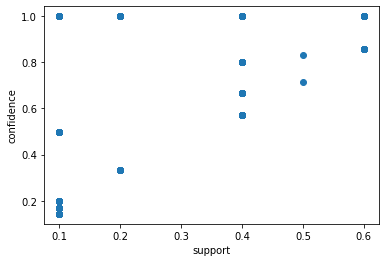

In [23]:
# visualization of obtained rule
plt.scatter(lift_1['support'],lift_1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### With 20% support and 85% confidence 

In [24]:
apri_2 = apriori(data,min_support = 0.2,use_colnames = True) #for frequent items
apri_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, V3_Sixth Sense, Gladiator, Patrio..."
77,0.4,"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla..."
78,0.4,"(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Pat..."
79,0.4,"(V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla..."


In [25]:
confidence_2 = association_rules(apri,metric = "confidence",min_threshold = 0.85)#selecting metric for confidence 0.85
confidence_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
3,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
4,(V2_LOTR1),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
56738,"(Harry Potter1, V2_LOTR1)","(V3_Harry Potter1, Green Mile, LOTR2, LOTR1, V...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56739,"(Sixth Sense, V2_LOTR1)","(V3_Harry Potter1, Green Mile, LOTR2, Harry Po...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56740,(V3_Harry Potter1),"(V4_Green Mile, Green Mile, LOTR2, LOTR1, V1_S...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56741,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [26]:
lift_2 = association_rules(apri,metric = "lift",min_threshold = 0.85)#selecting metric for confidence 0.85
lift_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64213,(Harry Potter1),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [27]:
lift_2[lift_2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64213,(Harry Potter1),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


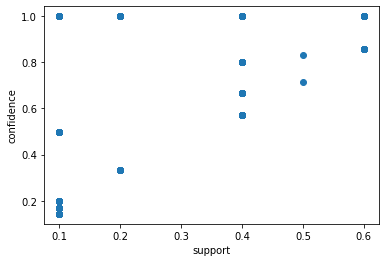

In [28]:
# visualization of obtained rule
plt.scatter(lift_2['support'],lift_2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### With 5% support and 90% confidence

In [29]:
apri_3 = apriori(data,min_support = 0.05,use_colnames = True) #for frequent items
apri_3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, V3_Harry Potter1, Green Mile, ..."
1393,0.1,"(V3_Harry Potter1, Green Mile, LOTR2, LOTR1, V..."
1394,0.1,"(V4_Green Mile, V3_Harry Potter1, Green Mile, ..."
1395,0.1,"(V4_Green Mile, V3_Harry Potter1, Green Mile, ..."


In [30]:
confidence_3 = association_rules(apri,metric = "confidence",min_threshold = 0.9)#selecting metric for confidence 0.90
confidence_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
3,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
4,(V2_LOTR1),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
56731,"(Harry Potter1, V2_LOTR1)","(V3_Harry Potter1, Green Mile, LOTR2, LOTR1, V...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56732,"(Sixth Sense, V2_LOTR1)","(V3_Harry Potter1, Green Mile, LOTR2, Harry Po...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56733,(V3_Harry Potter1),"(V4_Green Mile, Green Mile, LOTR2, LOTR1, V1_S...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
56734,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [31]:
lift_3 = association_rules(apri,metric = "lift",min_threshold = 0.9)#selecting metric for confidence 0.90
lift_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64213,(Harry Potter1),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [32]:
lift_3[lift_3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64213,(Harry Potter1),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, Green Mile, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


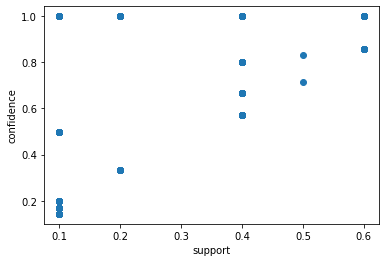

In [33]:
# visualization of obtained rule
plt.scatter(lift_3['support'],lift_3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

#### Conclusion:

we can say that sixth sense movie is more popuplar and can be associated with gladiator, harry potter, LOTR and Patriot movies and vice versa.